## Clustering

### MiniBatchKMeans
(an alternative top KMeans Clustering to resourcefully fit the entire sessions dataset)

In [ ]:
experimental_run = True

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [6]:
# BASE_DIR = Path.cwd().parent
BASE_DIR = '/content/drive/MyDrive/UP Honours/COS781 -Data Mining/Project'
OUTPUTS_DIR = '/content/drive/MyDrive/UP Honours/COS781 -Data Mining/Project/outputs'
try:
    X_scaled_df = pd.read_csv(f'{BASE_DIR}/session_feature_matrix_scaled.csv', index_col='session_id')
    print(f"Loaded scaled feature matrix with shape: {X_scaled_df.shape}")
except FileNotFoundError:
    print("Error: 'session_feature_matrix_scaled.csv' not found.")
    X_scaled_df = None

Loaded scaled feature matrix with shape: (1722864, 12)


Loaded scaled feature matrix with shape: (1722864, 12)
Starting with k=2
  True Inertia (WCSS) for k=2: 17316361.94
  Calculating silhouette score on sessions data...
  Silhouette Score for k=2: 0.3741
Starting with k=3
  True Inertia (WCSS) for k=3: 16669930.22
  Calculating silhouette score on sessions data...
  Silhouette Score for k=3: 0.2175
Starting with k=4
  True Inertia (WCSS) for k=4: 13814191.21
  Calculating silhouette score on sessions data...
  Silhouette Score for k=4: 0.3610
Starting with k=5
  True Inertia (WCSS) for k=5: 11628794.75
  Calculating silhouette score on sessions data...
  Silhouette Score for k=5: 0.3260
Starting with k=6
  True Inertia (WCSS) for k=6: 11314228.06
  Calculating silhouette score on sessions data...
  Silhouette Score for k=6: 0.3497
Starting with k=7
  True Inertia (WCSS) for k=7: 9116460.94
  Calculating silhouette score on sessions data...
  Silhouette Score for k=7: 0.4371
Starting with k=8
  True Inertia (WCSS) for k=8: 8369696.04
  Ca

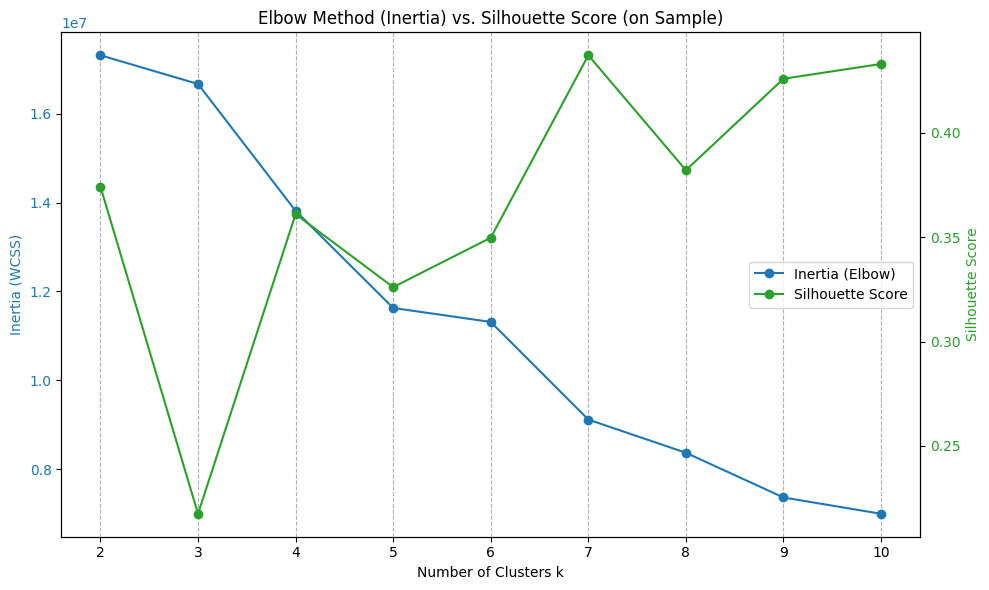

Done.


In [4]:
# Finding optimal number of cluster for MiniBatchKMeans - using the elbow curve & silhoutte scores

# Configuration
k_range = range(2, 11)
inertias = []
silhouette_scores = []
SILHOUETTE_SAMPLE_SIZE = 100000

inertias = []
silhouette_scores = []

n_samples = X_scaled_df.shape[0]
if SILHOUETTE_SAMPLE_SIZE > n_samples:
    SILHOUETTE_SAMPLE_SIZE = n_samples

for k in k_range:
    print(f'Starting with k={k}')
    kmeans = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto",
        batch_size=10000
    )

    kmeans.fit(X_scaled_df)
    distances = kmeans.transform(X_scaled_df)
    min_distances = np.min(distances, axis=1)
    true_inertia = np.sum(min_distances**2)
    inertias.append(true_inertia)
    print(f"  True Inertia (WCSS) for k={k}: {true_inertia:.2f}")

    print(f"  Calculating silhouette score on sessions data...")
    all_labels = kmeans.labels_
    # Create a random sample
    sample_indices = np.random.choice(n_samples, SILHOUETTE_SAMPLE_SIZE, replace=False)

    if isinstance(X_scaled_df, pd.DataFrame):
        X_sample = X_scaled_df.iloc[sample_indices]
    else:
        X_sample = X_scaled_df[sample_indices]

    labels_sample = all_labels[sample_indices]

    sil_score = silhouette_score(X_sample, labels_sample)
    silhouette_scores.append(sil_score)
    print(f"  Silhouette Score for k={k}: {sil_score:.4f}")

# --- Plotting (largely unchanged, just variable name updated) ---
print("\nPlotting results...")
fig, ax1 = plt.subplots(figsize=(10, 6)) # Made plot a bit wider

# Primary y-axis: Inertia (Elbow Method)
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters k')
ax1.set_ylabel('Inertia (WCSS)', color=color)
ax1.plot(k_range, inertias, 'o-', color=color, label='Inertia (Elbow)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='x', linestyle='--')

# Secondary y-axis: Silhouette Score
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_range, silhouette_scores, 'o-', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Elbow Method (Inertia) vs. Silhouette Score (on Sample)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(k_range)
# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

plt.show()
print("Done.")

In [17]:
# Using optimal clusters value (k=7) based on the the experiment above to cluster our sessions df

k = 7
SILHOUETTE_SAMPLE_SIZE = 100000

n_samples = X_scaled_df.shape[0]
# Ensure sample size does not exceed data size
if SILHOUETTE_SAMPLE_SIZE > n_samples:
    SILHOUETTE_SAMPLE_SIZE = n_samples

print(f'Starting clustering with k={k}')

# Fit MiniBatchKMeans with k=7
kmeans = MiniBatchKMeans(
    n_clusters=k,
    random_state=42,
    n_init="auto",
    batch_size=10000
)

kmeans.fit(X_scaled_df)
distances = kmeans.transform(X_scaled_df)
min_distances = np.min(distances, axis=1)
true_inertia = np.sum(min_distances**2)
print(f"True Inertia (WCSS) for k={k}: {true_inertia:.2f}")

print(f"Calculating silhouette score on {SILHOUETTE_SAMPLE_SIZE} samples...")
all_labels = kmeans.labels_
# Random sample indices
sample_indices = np.random.choice(n_samples, SILHOUETTE_SAMPLE_SIZE, replace=False)

if isinstance(X_scaled_df, pd.DataFrame):
    X_sample = X_scaled_df.iloc[sample_indices]
else:
    X_sample = X_scaled_df[sample_indices]

labels_sample = all_labels[sample_indices]
sil_score = silhouette_score(X_sample, labels_sample)
print(f"Silhouette Score for k={k}: {sil_score:.4f}")

print("Saving cluster labels")
cluster_labels = kmeans.labels_

X_nonscaled = pd.read_csv(f'{BASE_DIR}/session_feature_matrix.csv', index_col='session_id')
X_nonscaled['cluster'] = cluster_labels

# Output dataset (sessions) and cluster statistic
X_profile_kmeans = X_nonscaled.copy()
X_profile_kmeans['cluster'] = cluster_labels

print("Added cluster labels to original (unscaled) data.")

# 4. Profile the Clusters (Same method as K-Means)
print("Calculating cluster profiles (mean values)...\n")
cluster_profiles = X_profile_kmeans.groupby('cluster').mean(numeric_only=True)

# We should also get the size of each cluster
cluster_size = X_profile_kmeans['cluster'].value_counts().sort_index()
cluster_profiles['cluster_size'] = cluster_size
cluster_profiles['cluster_size_percent'] = (cluster_size / cluster_size.sum()) * 100

print("MiniBatchKMeans Cluster Profiles (k=7)")

# Transpose (T) for easier reading in the console
display(cluster_profiles.T)

# Merge cluster assignments back to the original features for enhanced plotting
# (Assumes you have an unscaled features DataFrame called orig_features with matching index/session_id)
orig_features = pd.read_csv(f'{BASE_DIR}/session_feature_matrix.csv', index_col='session_id')
orig_features['cluster'] = cluster_labels
orig_features.to_csv(f'{OUTPUTS_DIR}/session_feature_matrix_with_k7_clusters.csv', index=True)

print("Done.")

Starting clustering with k=7
True Inertia (WCSS) for k=7: 12128783.19
Calculating silhouette score on 100000 samples...
Silhouette Score for k=7: 0.4396
Saving cluster labels
Added cluster labels to original (unscaled) data.
Calculating cluster profiles (mean values)...

MiniBatchKMeans Cluster Profiles (k=7)


cluster,0,1,2,3,4,5,6
session_duration_sec,16.112284,0.124466,442.416794,0.302345,0.290570,1.935189,0.097931
total_events,1.076923,1.013734,3.364430,1.015468,1.013683,1.033042,1.011167
unique_items_viewed,1.018035,1.002726,2.399119,1.001055,1.001660,1.001033,1.000838
unique_categories_viewed,0.000000,1.000728,1.248390,1.000317,1.000625,1.000331,1.000236
avg_item_availability,0.000000,0.999510,0.631832,0.000151,0.634453,0.000009,0.000041
session_hour_of_day,12.630744,12.483358,12.658003,20.941231,9.429402,12.328898,15.903932
session_day_of_week,2.789819,5.530432,2.740895,1.925417,1.928961,5.512818,1.982570
addtocart_count,0.000444,0.007721,0.153437,0.000909,0.005219,0.000825,0.000863
transaction_count,0.000286,0.001475,0.042013,0.000364,0.001193,0.000309,0.000180
view_count,1.076194,1.004537,3.168981,1.014195,1.007271,1.031908,1.010124


Done.


#### MiniBatchKMeans - Visualizations

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


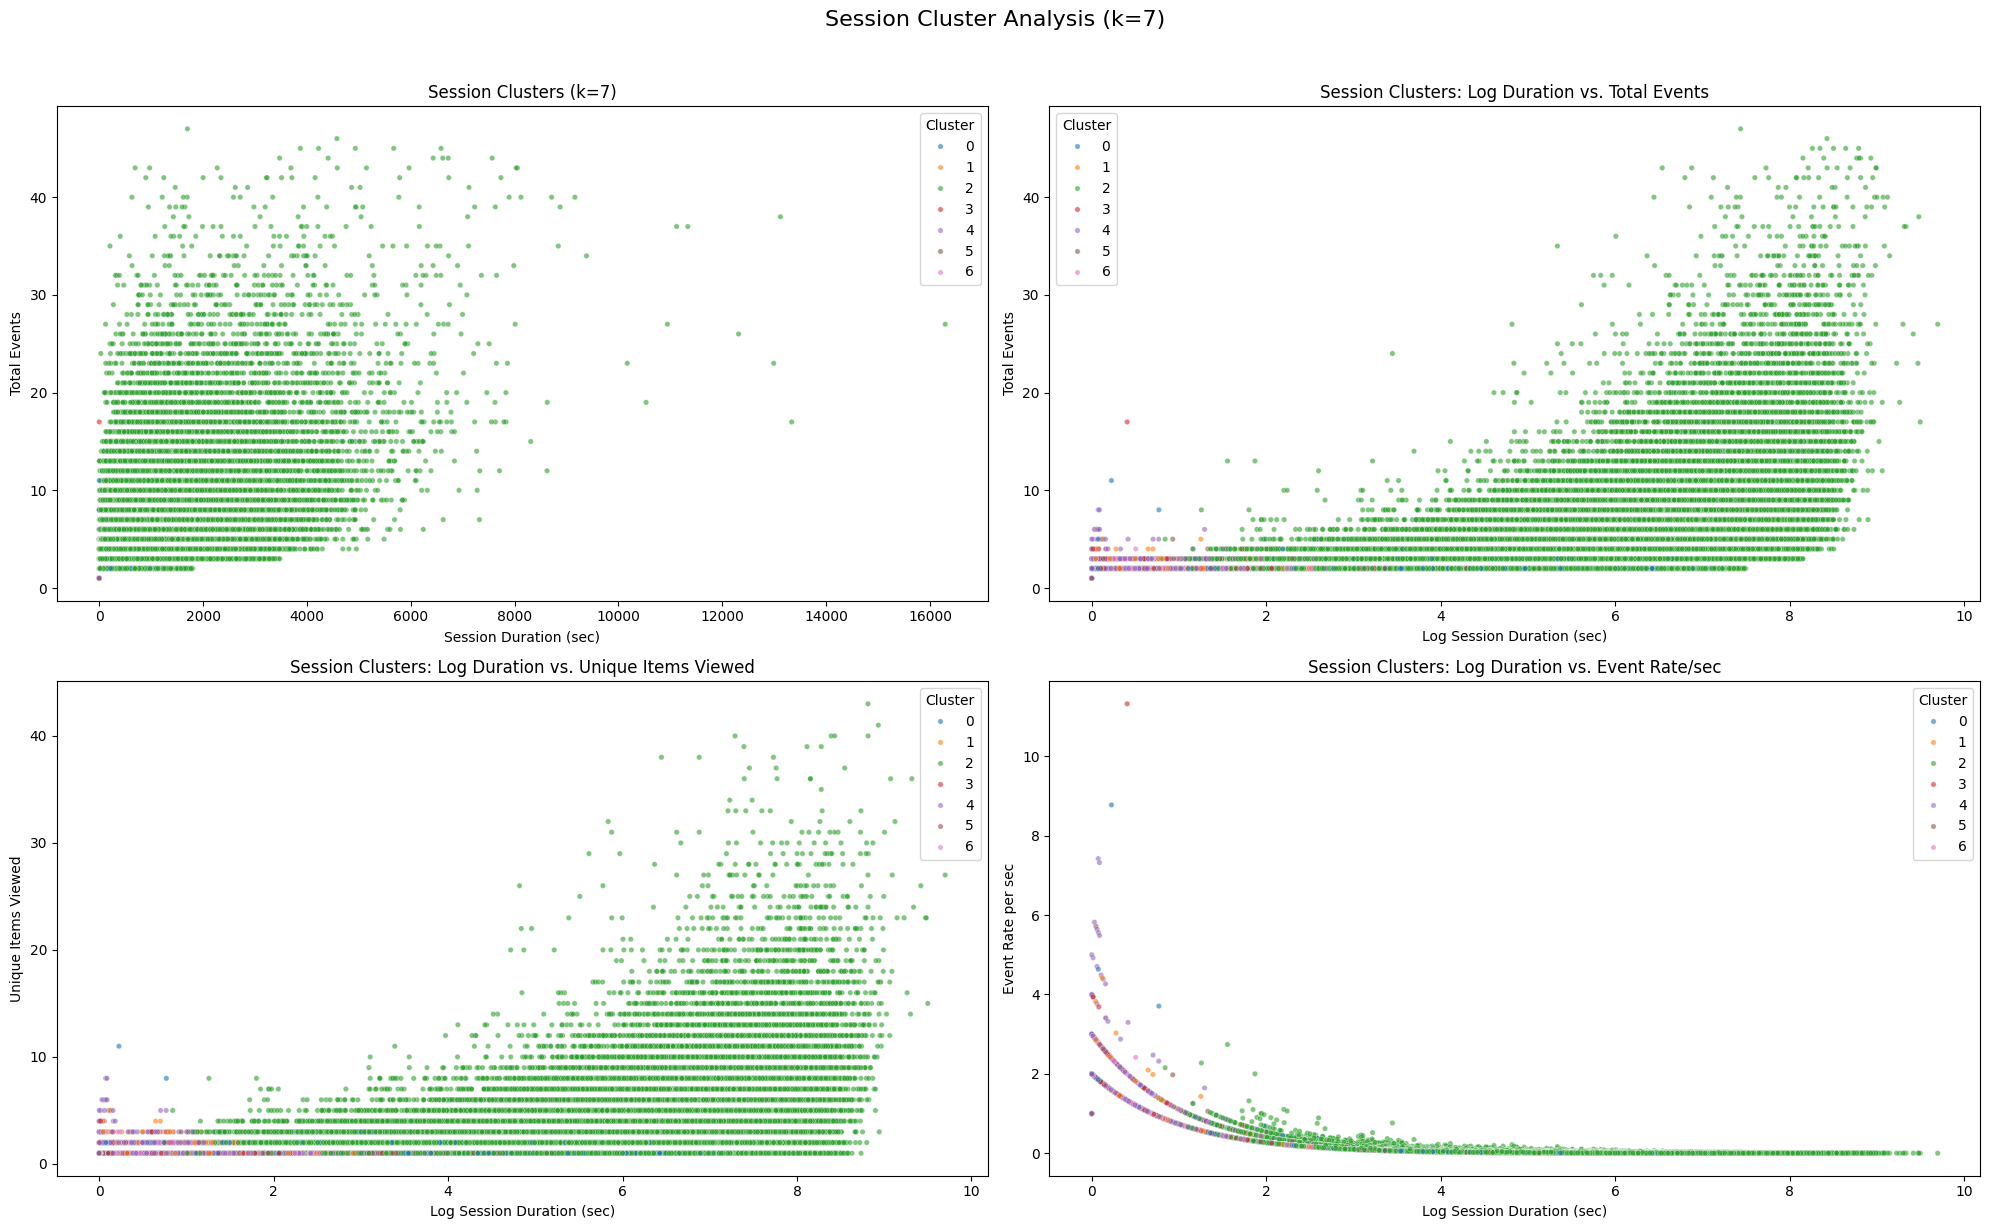

In [18]:
df_kmeans_clusters = pd.read_csv(f'{OUTPUTS_DIR}/session_feature_matrix_with_k7_clusters.csv', index_col='session_id')

# Pre-calculate the log duration column once
df_kmeans_clusters['log_session_duration'] = np.log(df_kmeans_clusters['session_duration_sec'] + 1)

# --- Create the 2x2 Subplot Grid ---
# Create one figure and a 2x2 grid of axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Add a main title for the entire figure
fig.suptitle('Session Cluster Analysis (k=7)', fontsize=16, y=1.02)


# 1. Session Duration vs. Total Events (linear)
# Plot on the first axis: axes[0, 0]
sns.scatterplot(
    data=df_kmeans_clusters,
    x='session_duration_sec',
    y='total_events',
    hue='cluster',
    palette='tab10',
    alpha=0.6,
    s=15,
    ax=axes[0, 0]  # Directs plot to the top-left subplot
)
axes[0, 0].set_title('Session Clusters (k=7)')
axes[0, 0].set_xlabel('Session Duration (sec)')
axes[0, 0].set_ylabel('Total Events')
axes[0, 0].legend(title='Cluster')


# 2. Log(Session Duration) vs. Total Events
# Plot on the second axis: axes[0, 1]
sns.scatterplot(
    data=df_kmeans_clusters,
    x='log_session_duration',
    y='total_events',
    hue='cluster',
    palette='tab10',
    alpha=0.6,
    s=15,
    ax=axes[0, 1]  # Directs plot to the top-right subplot
)
axes[0, 1].set_title('Session Clusters: Log Duration vs. Total Events')
axes[0, 1].set_xlabel('Log Session Duration (sec)')
axes[0, 1].set_ylabel('Total Events')
axes[0, 1].legend(title='Cluster')


# 3. Log(Session Duration) vs. Unique Items Viewed
# Plot on the third axis: axes[1, 0]
sns.scatterplot(
    data=df_kmeans_clusters,
    x='log_session_duration',
    y='unique_items_viewed',
    hue='cluster',
    palette='tab10',
    alpha=0.6,
    s=15,
    ax=axes[1, 0]  # Directs plot to the bottom-left subplot
)
axes[1, 0].set_title('Session Clusters: Log Duration vs. Unique Items Viewed')
axes[1, 0].set_xlabel('Log Session Duration (sec)')
axes[1, 0].set_ylabel('Unique Items Viewed')
axes[1, 0].legend(title='Cluster')


# 4. Log(Session Duration) vs. Event Rate per Second
# Plot on the fourth axis: axes[1, 1]
sns.scatterplot(
    data=df_kmeans_clusters,
    x='log_session_duration',
    y='event_rate_per_sec',
    hue='cluster',
    palette='tab10',
    alpha=0.6,
    s=15,
    ax=axes[1, 1]  # Directs plot to the bottom-right subplot
)
axes[1, 1].set_title('Session Clusters: Log Duration vs. Event Rate/sec')
axes[1, 1].set_xlabel('Log Session Duration (sec)')
axes[1, 1].set_ylabel('Event Rate per sec')
axes[1, 1].legend(title='Cluster')


# --- Finalize and Show Plot ---
# Apply tight_layout to the whole figure and then show it
plt.tight_layout()
plt.show()

## Association Rule Mining

### Market Basket Analysis

In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    message=r".*utcnow\(\) is deprecated.*"
)

In [22]:
if 'BASE_DIR' not in locals():
  BASE_DIR = '/content/drive/MyDrive/UP Honours/COS781 -Data Mining/Project'

try:
    # 1. Load the cluster assignments
    df_clusters = pd.read_csv(f'{BASE_DIR}/session_feature_matrix_with_k7_clusters.csv', index_col='session_id')
    print(f"Successfully loaded {len(df_clusters)} sessions with MiniBatchKMeans cluster labels.")

    # 2. Load the raw events log
    df_events_raw = pd.read_csv(f'{BASE_DIR}/dataset/events.csv')
    print(f"Successfully loaded {len(df_events_raw)} raw events.")

    # 3. Load the category baskets
    with open(f'{BASE_DIR}/category_baskets.csv', 'r') as f:
        all_baskets_list = [list(map(int, line.strip().split(','))) for line in f]

    # 4. We also need the transactionid index from that file for mapping
    basket_index_df = pd.read_csv(f'{BASE_DIR}/category_baskets.csv', header=None, usecols=[0], names=['transactionid'])

    # 5. We explicitly create a DataFrame with one column named 'basket'
    # and assign the list of lists (all_baskets_list) to that single column.
    basket_map = pd.DataFrame({'basket': all_baskets_list}, index=basket_index_df['transactionid'])

    print(f"Successfully loaded {len(basket_map)} total market baskets.")

except FileNotFoundError as e:
    print(f"Error: A required file was not found. {e}")
    print("Please ensure 'session_feature_matrix_with_k7_clusters.csv', 'events.csv', and 'category_baskets.csv' are in the same directory.")

try:
    print("Re-running cleaning and sessionization to create session-transaction map...")

    # Fill expected NaNs
    df_events_raw['transactionid'] = df_events_raw['transactionid'].fillna(0).astype(int)

    # 2. Re-run identical noise handling from Milestone 1
    events_per_visitor = df_events_raw.groupby('visitorid')['event'].count()
    outlier_threshold = events_per_visitor.quantile(0.999)
    outlier_visitors = events_per_visitor[events_per_visitor > outlier_threshold].index
    df_events_cleaned = df_events_raw[~df_events_raw['visitorid'].isin(outlier_visitors)].copy()

    # 3. Re-run identical sessionization from Milestone 1
    df_events_cleaned['timestamp_dt'] = pd.to_datetime(df_events_cleaned['timestamp'], unit='ms')
    df_events_cleaned.sort_values(by=['visitorid', 'timestamp_dt'], inplace=True)
    session_timeout_seconds = 30 * 60
    df_events_cleaned['time_diff_seconds'] = df_events_cleaned.groupby('visitorid')['timestamp_dt'].diff().dt.total_seconds()
    df_events_cleaned['new_session_flag'] = (df_events_cleaned['time_diff_seconds'] > session_timeout_seconds) | (df_events_cleaned['time_diff_seconds'].isnull())
    df_events_cleaned['session_increment_id'] = df_events_cleaned.groupby('visitorid')['new_session_flag'].cumsum()
    df_events_cleaned['session_id'] = df_events_cleaned['visitorid'].astype(str) + '_' + df_events_cleaned['session_increment_id'].astype(str)

    # 4. Create the final map
    # We only need session_id and transactionid, and we only care about actual transactions
    session_to_transaction_map = df_events_cleaned[
        df_events_cleaned['transactionid'] != 0
    ][['session_id', 'transactionid']].drop_duplicates()

    print(f"Successfully created mapping for {len(session_to_transaction_map)} session-transaction pairs.")
    print(session_to_transaction_map.head())
except FileNotFoundError as e:
    print(f"Error: Failed to create sessionization to create session-transaction map. {e}")
    print("Please ensure 'session_feature_matrix_with_k7_clusters.csv', 'events.csv', and 'category_baskets.csv' are in the same directory.")


Successfully loaded 1722864 sessions with MiniBatchKMeans cluster labels.
Successfully loaded 2756101 raw events.
Successfully loaded 12185 total market baskets.
Re-running cleaning and sessionization to create session-transaction map...
Successfully created mapping for 12191 session-transaction pairs.
        session_id  transactionid
848114       172_4           9725
814996       186_1           8726
1276395      264_1           8445
2687635      419_3          16455
273133       539_1          14778


In [23]:
# Identify our target cluster's session IDs
CLUSTER_ID = 2 # This is our "Determined Buyer" cluster
buyer_session_ids = df_clusters[df_clusters['cluster'] == CLUSTER_ID].index
print(f"Identified {len(buyer_session_ids):,} sessions in Cluster {CLUSTER_ID}.")

# 2. Find the transaction IDs for this cluster
target_transactions = session_to_transaction_map[
    session_to_transaction_map['session_id'].isin(buyer_session_ids)
]
target_transaction_ids = target_transactions['transactionid'].unique()
print(f"Found {len(target_transaction_ids):,} unique transaction IDs for Cluster {CLUSTER_ID}.")

# 3. Filter the main basket_map
cluster_baskets_df = basket_map[basket_map.index.isin(target_transaction_ids)]
cluster_baskets_list = cluster_baskets_df['basket'].tolist()

print(f"Successfully filtered to {len(cluster_baskets_list)} market baskets for Apriori.")

Identified 331,652 sessions in Cluster 2.
Found 78 unique transaction IDs for Cluster 2.
Successfully filtered to 71 market baskets for Apriori.


In [25]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

print("# Mining Cluster 4 ('Determined Buyer') Rules ---")

# 1. One-hot encode the transaction data
# This converts your list of baskets (['item1', 'item2'], ...)
# into a 0/1 DataFrame that apriori can read.
te = TransactionEncoder()
te_ary = te.fit(cluster_baskets_list).transform(cluster_baskets_list)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# 2. Run Apriori to find frequent itemsets
# We use a higher min_support (0.5%) because this is a larger, sparse group.
min_support_threshold = 0.005
frequent_itemsets_cluster = apriori(df_onehot, min_support=min_support_threshold, use_colnames=True)
print(f"Found {len(frequent_itemsets_cluster)} frequent itemsets in Cluster 4 with min_support={min_support_threshold}.")
display(frequent_itemsets_cluster.head())

# 3. Generate association rules
# First, generate all rules that meet our *lift* threshold.
# We use a high lift (>= 1.5) to find strong, non-random patterns.
min_lift_threshold = 1.5
cluster_rules = association_rules(frequent_itemsets_cluster, metric="lift", min_threshold=min_lift_threshold)

# 4. Filter rules by Confidence (THE KEY UPDATE)
# A high lift can be misleading if confidence is low.
# We must also filter for a minimum confidence to ensure the rules are *reliable* and *actionable*.
# A 50% confidence means "If the customer buys A, there's a 50% chance they also buy B."
min_confidence_threshold = 0.5
original_rule_count = len(cluster_rules)

# Apply the new confidence filter
cluster_rules = cluster_rules[cluster_rules['confidence'] >= min_confidence_threshold]

print(f"Generated {original_rule_count} rules with lift >= {min_lift_threshold}.")
print(f"Kept {len(cluster_rules)} rules after filtering for confidence >= {min_confidence_threshold}.")

# 5. Sort, Display, and Save results
# Sort by lift (or confidence, or both) to find the 'best' rules.
cluster_rules = cluster_rules.sort_values(by='lift', ascending=False)

print("\n# Top 10 Rules for 'Determined Buyers' (by Lift, filtered by Confidence)")
display(cluster_rules.head(10))

# Save the final, filtered rules
cluster_rules.to_csv(f'{BASE_DIR}/cluster_4_rules.csv', index=False)
print(f"\nSaved Cluster 4 rules to '{BASE_DIR}/cluster_4_rules.csv'")

# Mining Cluster 4 ('Determined Buyer') Rules ---
Found 89 frequent itemsets in Cluster 4 with min_support=0.005.


,support,itemsets
0,0.014085,(84)
1,0.084507,(133)
2,0.042254,(470)
3,0.014085,(497)
4,0.056338,(562)


Generated 640 rules with lift >= 1.5.
Kept 596 rules after filtering for confidence >= 0.5.

# Top 10 Rules for 'Determined Buyers' (by Lift, filtered by Confidence)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
639,(959),"(586, 589, 1135, 497, 628)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
638,(628),"(586, 589, 1135, 497, 959)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
619,"(586, 589)","(497, 628, 959, 1135)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
618,"(497, 628, 959)","(586, 589, 1135)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
617,"(959, 628, 1135)","(497, 586, 589)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
616,"(497, 959, 1135)","(586, 628, 589)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
615,"(497, 628, 1135)","(586, 589, 959)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
614,"(628, 589, 959)","(497, 586, 1135)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
613,"(497, 589, 959)","(586, 628, 1135)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0
612,"(497, 628, 589)","(959, 586, 1135)",0.014085,0.014085,0.014085,1.0,71.0,1.0,0.013886,inf,1.0,1.0,1.0,1.0



Saved Cluster 4 rules to '/content/drive/MyDrive/UP Honours/COS781 -Data Mining/Project/cluster_4_rules.csv'
